In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Unzip file

In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/missouri_camera_traps_images.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
path = '/content/Set1'

##Extract Image Paths

In [5]:
import os
data = []
for i in os.listdir(path):
  if i=='README.txt' or i=='labels.txt':
    continue
  q=path+'/'+i
  for j in os.listdir(q):
    r=q+'/'+j
    for k in os.listdir(r):
      data.append(r+'/'+k)

In [6]:
print(len(data))

24673


#Data Preprocessing

### Split into train and test sets


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define paths and parameters
data_dir = path
num_classes = len(os.listdir(data_dir))-2
print(num_classes)

# Create a DataFrame to organize the data
data_df = pd.DataFrame(data, columns=['image_path'])
data_df['class'] = data_df['image_path'].apply(lambda x: os.path.normpath(x).split(os.sep)[-3])
data_df.head()
data_df=data_df.sample(frac = 1)

# Split data into train and test sets
train_df, temp_df = train_test_split(data_df, test_size=0.35, random_state=0)
val_df, test_df = train_test_split(temp_df, test_size=0.2, random_state=0)

20


In [8]:
train_df.head()

,image_path,class
15001,/content/Set1/1.80-Coiban_Agouti/SEQ82806/SEQ8...,1.80-Coiban_Agouti
4257,/content/Set1/1.06-Paca/SEQ88814/SEQ88814_IMG_...,1.06-Paca
3146,/content/Set1/1.03-Collared_Peccary/SEQ84581/S...,1.03-Collared_Peccary
5255,/content/Set1/1.57-Red_Deer/SEQ83202/SEQ83202_...,1.57-Red_Deer
1063,/content/Set1/1.08-White-nosed_Coati/SEQ89842/...,1.08-White-nosed_Coati


In [9]:
train_df.iloc[:,1] = train_df.iloc[:,1].str.replace('\d+', '')
train_df.iloc[:,1] = train_df.iloc[:,1].str.replace('.-', '')
train_df.head()

<ipython-input-9-ab964bfcd5ea>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df.iloc[:,1] = train_df.iloc[:,1].str.replace('\d+', '')
<ipython-input-9-ab964bfcd5ea>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df.iloc[:,1] = train_df.iloc[:,1].str.replace('.-', '')


,image_path,class
15001,/content/Set1/1.80-Coiban_Agouti/SEQ82806/SEQ8...,Coiban_Agouti
4257,/content/Set1/1.06-Paca/SEQ88814/SEQ88814_IMG_...,Paca
3146,/content/Set1/1.03-Collared_Peccary/SEQ84581/S...,Collared_Peccary
5255,/content/Set1/1.57-Red_Deer/SEQ83202/SEQ83202_...,Red_Deer
1063,/content/Set1/1.08-White-nosed_Coati/SEQ89842/...,Whitnosed_Coati


In [10]:
len(train_df)

16037

In [11]:
val_df.head()

,image_path,class
283,/content/Set1/1.08-White-nosed_Coati/SEQ82548/...,1.08-White-nosed_Coati
14159,/content/Set1/1.80-Coiban_Agouti/SEQ83003/SEQ8...,1.80-Coiban_Agouti
11922,/content/Set1/1.58-Roe_Deer/SEQ79936/SEQ79936_...,1.58-Roe_Deer
203,/content/Set1/1.08-White-nosed_Coati/SEQ83827/...,1.08-White-nosed_Coati
2846,/content/Set1/1.19-Common_Opossum/SEQ75871/SEQ...,1.19-Common_Opossum


In [12]:
val_df.iloc[:,1] = val_df.iloc[:,1].str.replace('\d+', '')
val_df.iloc[:,1] = val_df.iloc[:,1].str.replace('.-', '')
val_df.head()

<ipython-input-12-ef4cf083e524>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  val_df.iloc[:,1] = val_df.iloc[:,1].str.replace('\d+', '')
<ipython-input-12-ef4cf083e524>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  val_df.iloc[:,1] = val_df.iloc[:,1].str.replace('.-', '')


,image_path,class
283,/content/Set1/1.08-White-nosed_Coati/SEQ82548/...,Whitnosed_Coati
14159,/content/Set1/1.80-Coiban_Agouti/SEQ83003/SEQ8...,Coiban_Agouti
11922,/content/Set1/1.58-Roe_Deer/SEQ79936/SEQ79936_...,Roe_Deer
203,/content/Set1/1.08-White-nosed_Coati/SEQ83827/...,Whitnosed_Coati
2846,/content/Set1/1.19-Common_Opossum/SEQ75871/SEQ...,Common_Opossum


In [13]:
len(val_df)

6908

In [14]:
test_df.head()

,image_path,class
14807,/content/Set1/1.80-Coiban_Agouti/SEQ80017/SEQ8...,1.80-Coiban_Agouti
11085,/content/Set1/1.22-Bird_spec/SEQ85786/SEQ85786...,1.22-Bird_spec
13384,/content/Set1/1.02-Agouti/SEQ75520/SEQ75520_IM...,1.02-Agouti
2783,/content/Set1/1.19-Common_Opossum/SEQ90254/SEQ...,1.19-Common_Opossum
891,/content/Set1/1.08-White-nosed_Coati/SEQ90327/...,1.08-White-nosed_Coati


In [15]:
test_df.iloc[:,1] = test_df.iloc[:,1].str.replace('\d+', '')
test_df.iloc[:,1] = test_df.iloc[:,1].str.replace('.-', '')
test_df.head()

<ipython-input-15-9741ceb95232>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df.iloc[:,1] = test_df.iloc[:,1].str.replace('\d+', '')
<ipython-input-15-9741ceb95232>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df.iloc[:,1] = test_df.iloc[:,1].str.replace('.-', '')


,image_path,class
14807,/content/Set1/1.80-Coiban_Agouti/SEQ80017/SEQ8...,Coiban_Agouti
11085,/content/Set1/1.22-Bird_spec/SEQ85786/SEQ85786...,Bird_spec
13384,/content/Set1/1.02-Agouti/SEQ75520/SEQ75520_IM...,Agouti
2783,/content/Set1/1.19-Common_Opossum/SEQ90254/SEQ...,Common_Opossum
891,/content/Set1/1.08-White-nosed_Coati/SEQ90327/...,Whitnosed_Coati


In [16]:
len(test_df)

1728

In [17]:
data_df['class'].nunique()

20

In [18]:
train_df.iloc[:,1].unique()

array(['Coiban_Agouti', 'Paca', 'Collared_Peccary', 'Red_Deer',
       'Whitnosed_Coati', 'Roe_Deer', 'Spiny_Rat', 'Great_Tinamou',
       'Mouflon', 'Ocelot', 'Wild_Boar', 'White_Tailed_Deer', 'Agouti',
       'Wood_Mouse', 'Red_Fox', 'Red_Brocket_Deer', 'Red_Squirrel',
       'European_Hare', 'Bird_spec', 'Common_Opossum'], dtype=object)

In [19]:
test_df.iloc[:,1].unique()

array(['Coiban_Agouti', 'Bird_spec', 'Agouti', 'Common_Opossum',
       'Whitnosed_Coati', 'Red_Squirrel', 'Paca', 'Wild_Boar',
       'White_Tailed_Deer', 'Collared_Peccary', 'Ocelot', 'Roe_Deer',
       'Red_Deer', 'Wood_Mouse', 'Spiny_Rat', 'Great_Tinamou', 'Mouflon',
       'Red_Brocket_Deer', 'European_Hare', 'Red_Fox'], dtype=object)

In [20]:
set(train_df.iloc[:,1].unique()).difference(set(test_df.iloc[:,1].unique()))

set()

In [21]:
set(test_df.iloc[:,1].unique()).difference(set(train_df.iloc[:,1].unique()))

set()

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(train_df.iloc[:,1].values)
train_df['class'] = le.transform(train_df.iloc[:,1].values)
val_df['class'] = le.transform(val_df.iloc[:,1].values)
test_df['class'] = le.transform(test_df.iloc[:,1].values)

In [23]:
train_df.head()

,image_path,class
15001,/content/Set1/1.80-Coiban_Agouti/SEQ82806/SEQ8...,2
4257,/content/Set1/1.06-Paca/SEQ88814/SEQ88814_IMG_...,9
3146,/content/Set1/1.03-Collared_Peccary/SEQ84581/S...,3
5255,/content/Set1/1.57-Red_Deer/SEQ83202/SEQ83202_...,11
1063,/content/Set1/1.08-White-nosed_Coati/SEQ89842/...,17


In [24]:
val_df.head()

,image_path,class
283,/content/Set1/1.08-White-nosed_Coati/SEQ82548/...,17
14159,/content/Set1/1.80-Coiban_Agouti/SEQ83003/SEQ8...,2
11922,/content/Set1/1.58-Roe_Deer/SEQ79936/SEQ79936_...,14
203,/content/Set1/1.08-White-nosed_Coati/SEQ83827/...,17
2846,/content/Set1/1.19-Common_Opossum/SEQ75871/SEQ...,4


In [25]:
test_df.head()

,image_path,class
14807,/content/Set1/1.80-Coiban_Agouti/SEQ80017/SEQ8...,2
11085,/content/Set1/1.22-Bird_spec/SEQ85786/SEQ85786...,1
13384,/content/Set1/1.02-Agouti/SEQ75520/SEQ75520_IM...,0
2783,/content/Set1/1.19-Common_Opossum/SEQ90254/SEQ...,4
891,/content/Set1/1.08-White-nosed_Coati/SEQ90327/...,17


In [26]:
train_df.to_csv('train_set.csv',index=False)
val_df.to_csv('val_set.csv',index=False)
test_df.to_csv('test_set.csv',index=False)

In [27]:
import numpy as np
np.save('picture_identify_label_encoder.npy', le.classes_)

### Dataloader

In [28]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

train_df = pd.read_csv('train_set.csv')
val_df = pd.read_csv('val_set.csv')
test_df = pd.read_csv('test_set.csv')

In [29]:
class ImageDataset(Dataset):
    def __init__(self, data, transform=None, target_transform=None):
        self.df = data
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx, 0]
        try:
          image = Image.open(img_path)
          label = self.df.iloc[idx, 1]
          if self.transform:
              image = self.transform(image)
          if self.target_transform:
              label = self.target_transform(label)
          return image, label
        except:
          return None

In [30]:
import torch

def collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    return torch.utils.data.dataloader.default_collate(batch)

In [31]:
from torch.utils.data import DataLoader
import torchvision.transforms as T

batch_size = 64

train_transform = T.Compose([
   T.Resize((224, 224)),
   T.ToTensor()
])

train_dataset = ImageDataset(train_df, train_transform)

trainloader = DataLoader(train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=os.cpu_count() - 1,
    pin_memory=True,
    collate_fn=collate_fn)

val_transform = T.Compose([
   T.Resize((224, 224)),
   T.ToTensor()
])

val_dataset = ImageDataset(val_df, val_transform)

valloader = DataLoader(val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=os.cpu_count() - 1,
    pin_memory=True,
    collate_fn=collate_fn)

image_datasets = {'train':train_dataset, 'val':val_dataset}
dataloaders = {'train': trainloader, 'val' : valloader}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
# class_names = image_datasets['train'].classes

In [32]:
import numpy as np
for i, j in enumerate(dataloaders['train']):
  if i < 5:
    print(j[0].shape, j[1].shape)
  else:
    break

torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])


In [33]:
for i, j in enumerate(dataloaders['val']):
  if i < 5:
    print(j[0].shape, j[1].shape)
  else:
    break

torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])
torch.Size([64, 3, 224, 224]) torch.Size([64])


#Building the CNN Model

In [34]:
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, Module
import torch.nn.functional as F

num_classes = 20

class classifier(Module):
    def __init__(self):
        super(classifier, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(12544, 64),
            Linear(64, num_classes)
        )

    # Defining the forward pass
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

model = classifier()

In [35]:
from torchvision.models import resnet18
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

criterion = CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=1000, eta_min=0, last_epoch=-1, verbose=False)

In [36]:
model

classifier(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=12544, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=20, bias=True)
  )
)

In [37]:
device

device(type='cuda', index=0)

In [38]:
import time

def train_model(model, criterion, optimizer, num_epochs=10):

    model.to(device)

    since = time.time()

    # Create a temporary directory to save training checkpoints
    best_model_params_path = os.path.join('/content/', 'best_model.pth')

    torch.save(model.state_dict(), best_model_params_path)
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # if phase == 'train':
            #     scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), best_model_params_path)

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(torch.load(best_model_params_path))

    return model, epoch_loss, epoch_acc

In [39]:
model, epoch_loss, epoch_acc = train_model(model, criterion, optimizer)

Epoch 0/9
----------
train Loss: 1.2813 Acc: 0.6061
val Loss: 0.6822 Acc: 0.8004

Epoch 1/9
----------
train Loss: 0.4536 Acc: 0.8672
val Loss: 0.3344 Acc: 0.9110

Epoch 2/9
----------
train Loss: 0.2406 Acc: 0.9340
val Loss: 0.2440 Acc: 0.9324

Epoch 3/9
----------
train Loss: 0.1470 Acc: 0.9652
val Loss: 0.1656 Acc: 0.9531

Epoch 4/9
----------
train Loss: 0.1028 Acc: 0.9751
val Loss: 0.1490 Acc: 0.9605

Epoch 5/9
----------
train Loss: 0.0730 Acc: 0.9832
val Loss: 0.1000 Acc: 0.9754

Epoch 6/9
----------
train Loss: 0.0542 Acc: 0.9895
val Loss: 0.0960 Acc: 0.9773

Epoch 7/9
----------
train Loss: 0.0411 Acc: 0.9919
val Loss: 0.0727 Acc: 0.9841

Epoch 8/9
----------
train Loss: 0.0340 Acc: 0.9938
val Loss: 0.0843 Acc: 0.9792

Epoch 9/9
----------
train Loss: 0.0307 Acc: 0.9942
val Loss: 0.0705 Acc: 0.9826

Training complete in 134m 41s
Best val Acc: 0.984076


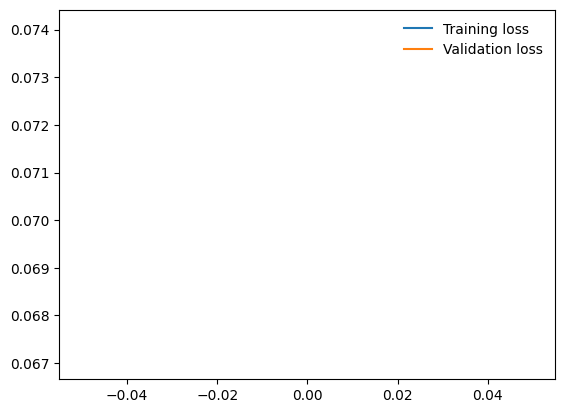

In [40]:
plt.plot(epoch_loss, label='Training loss')
plt.plot(epoch_loss, label='Validation loss')
plt.legend(frameon=False)
plt.show()